From the challenge name, and the de-anonymization theme, we can already guess that we will need some additional ressources to solve this challenge in the intended way.

[Narayanan, A., & Shmatikov, V. (2006). How To Break Anonymity of the Netflix Prize Dataset. arXiv.](https://doi.org/10.48550/arXiv.cs/0610105)
will be our guide to solve this one

Let's Load our data first,

In [78]:
import pandas as pd
db = pd.read_csv("/content/gdrive/MyDrive/Datasets/Netflix Prize/ratings.csv", encoding="UTF-8",sep=";")
movies = pd.read_csv("movies.csv")

Here's our background knowledge `aux`, let's extract usefull information and contruct a usefull DataFrame that will serve us a auxialiary information


Netflix data has been leaked 😟
I think it's the perfect time to sneak and get some insights about what a close friend could be watching 👀, unfortunately data has been anonymized but I heared that some of you could help me finding his record, for that let me help you with what I know:


*   I've seen him talking about the `Ghost Writer, The (2010)	` and he was saying that he didn't like it that much, this dates back to 2012
*   He was also talking about `This fool (2002)` and saying that he did like it, not a 10 tho. this dates back to `2006-10-12`.
*   Finally, he did mention the name of a famous film `Harry Potter and the Deathly Hallows: Part 2 (2011)`, saying he did really like it, this dates back to `2012-04-24`

**NOTES**:
* that timestamp are days from `1998-10-01`(YY-MM-DD)
* there might be some familiar records, try the top ones!



*   First Hint we can get : `movieId==74545`, `rating==1.0-2.0`, `timestamp=4840.0 (01-01-2012)`
*   Second Hint : `movieId==?`, `rating==4.0`, `timestamp=2375.0(12-10-2006)`
*   Third Hint : `movieId==88125`, `rating==5.0`, `timestamp=4954.0(24-04-2012)`



In [79]:
#auxialiary dataframe
aux = {'userId':[12, 12, 12], 'movieId':[88125, 74545, 111111111], 'rating':[5.0, 1.0, 4.0], 'timestamp':[4954.0, 4840.0, 2375.0]}
aux = pd.DataFrame(aux)

In [80]:
import numpy as np
def get_scores(db, df):
  
  db.rename(columns={"userId":"uNet"},inplace=1)
  df.rename(columns={"userId":"uAux"},inplace=1)

  weight = 1/np.log10(db.loc[:,"movieId"].value_counts())

  db.set_index(["movieId"],inplace=True)
  df.set_index(["movieId"],inplace=True)

  com_movies = db.index.unique().intersection(df.index.unique())
  
  db_com = db.loc[com_movies,:]
  df_com = df.loc[com_movies,:]

  res = db_com.subtract(df_com,fill_value=0).astype(np.int64)

  res = np.abs(res)

  result = weight.loc[com_movies]*(np.exp(-res.loc[:,'rating']/1.5) + np.exp(-res.loc[:,'timestamp']/30))

  res.loc[:,"score"] = result
  res.drop(["rating", "timestamp"],axis=1,inplace=True)
  res.set_index(['uNet','uAux'],inplace=True)

  R = res.groupby(level=[0,1]).sum()

  return R

In [81]:
R = get_scores(db, aux)

In [82]:
R.sort_values(by=['score'], ascending=False).head(10)

,,score
uNet,uAux,
21891,12,0.630647
15758,12,0.603289
129349,12,0.597947
20309,12,0.555523
69274,12,0.546417
130671,12,0.546417
45904,12,0.546417
58123,12,0.541488
75262,12,0.537609


Let's try the top probabilities...

`userId==129349` seems to work, we got our flag
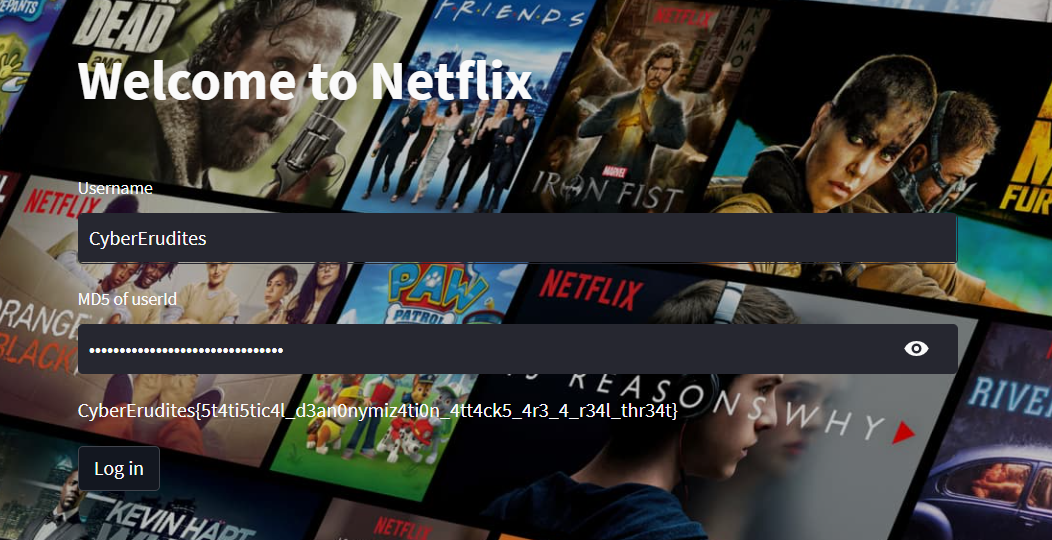KL